In [ ]:
# Upload the CSV File
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'StudentsPerformance.csv'
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving StudentsPerformance.csv to StudentsPerformance (2).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [ ]:
# STEP 3: Basic Info & Preprocessing
print(df.info())
print(df.describe())

# Rename columns if needed (remove whitespace)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# STEP 4: One-Hot Encoding for Categorical Features
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,math_score,reading_score,writing_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


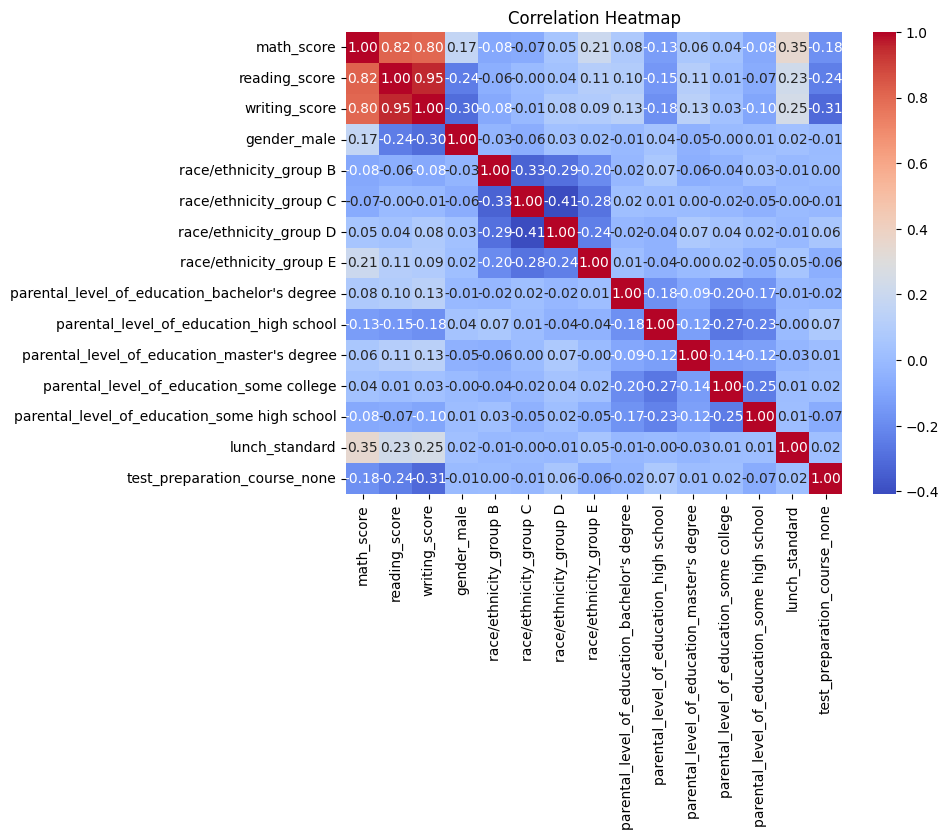

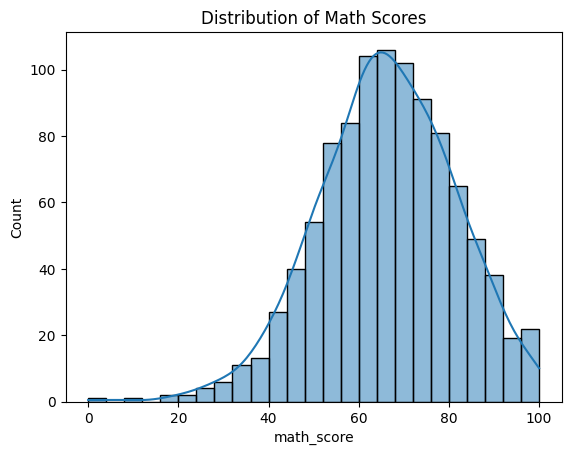

In [ ]:
# STEP 5: Visualizations
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Plot distribution of math scores
sns.histplot(df['math_score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

In [ ]:
# STEP 6: Model Building - Predict math_score
X = df_encoded.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = df_encoded['math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# STEP 7: Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Model Performance:
R² Score: 0.1760
MAE: 11.27
RMSE: 14.16


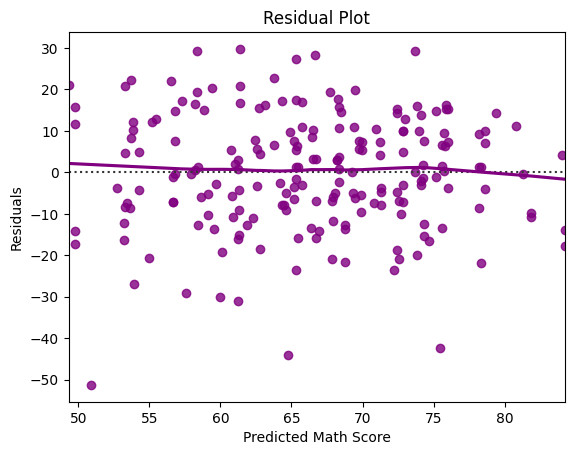

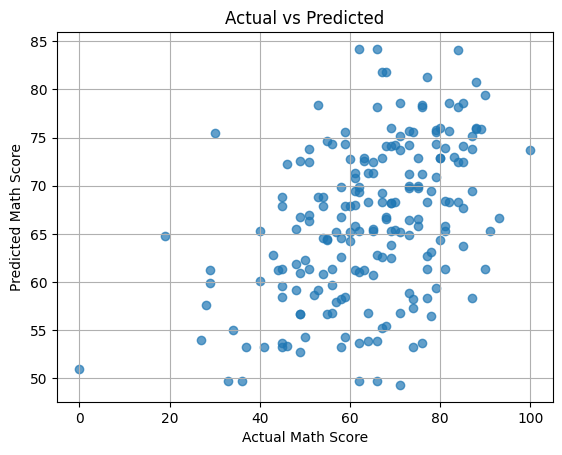

In [ ]:
# STEP 8: Residual Plot
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="purple")
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
# BONUS STEP: Compare by Gender
genders = df['gender'].unique()
for gender in genders:
    subset = df[df['gender'] == gender]
    subset_encoded = pd.get_dummies(subset.drop(columns=['reading_score', 'writing_score']), drop_first=True)

    X = subset_encoded.drop('math_score', axis=1)
    y = subset_encoded['math_score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nGender: {gender}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")



Gender: female
R² Score: 0.2663
MAE: 11.75
RMSE: 14.85

Gender: male
R² Score: 0.1226
MAE: 10.26
RMSE: 13.20
